<a href="https://colab.research.google.com/github/https-deeplearning-ai/tensorflow-1-public/blob/master/C3/W3/ungraded_labs/C3_W3_Lab_6_sarcasm_with_1D_convolutional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ungraded Lab: Training a Sarcasm Detection Model using a Convolution Layer

You will be doing the same steps here as the previous lab but will be using a convolution layer instead. As usual, try tweaking the parameters and observe how it affects the results.


## Download the Dataset

In [1]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2024-04-22 18:12:24--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.207, 108.177.97.207, 142.250.157.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  4.72MB/s    in 1.1s    

2024-04-22 18:12:25 (4.72 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



In [5]:
import json

# Load the JSON file
with open("./sarcasm.json", 'r') as f:
    datastore = json.load(f)

# Initialize the lists
sentences = []
labels = []

# Collect sentences and labels into the lists
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

## Split the Dataset

In [6]:
training_size = 20000

# Split the sentences
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

# Split the labels
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

## Data preprocessing

In [7]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert the labels lists into numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

## Build and Compile the Model

In [10]:
import tensorflow as tf

# Parameters
embedding_dim = 16
filters = 128
kernel_size = 5
dense_dim = 6

# Model Definition with Conv1D
model_conv = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(filters, kernel_size, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_conv.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_conv.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 16)           160000    
                                                                 
 conv1d_2 (Conv1D)           (None, 116, 128)          10368     
                                                                 
 global_max_pooling1d_2 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_4 (Dense)             (None, 6)                 774       
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 171149 (668.55 KB)
Trainable params: 171149 (668.55 KB)
Non-trainable params: 0 (0.00 Byte)
______________

In [11]:
import tensorflow as tf

# Parameters
embedding_dim = 16
filters = 64
kernel_size = 5
dense_dim = 6

# Model Definition with Conv1D
model_conv_1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(filters, kernel_size, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_conv_1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_conv_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 120, 16)           160000    
                                                                 
 conv1d_3 (Conv1D)           (None, 116, 64)           5184      
                                                                 
 global_max_pooling1d_3 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_6 (Dense)             (None, 6)                 390       
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 165581 (646.80 KB)
Trainable params: 165581 (646.80 KB)
Non-trainable params: 0 (0.00 Byte)
______________

## Train the Model

In [12]:
NUM_EPOCHS = 10

# Train the model
history_conv = model_conv.fit(training_padded, training_labels, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels))

Epoch 1/10
625/625 [==============================] - 21s 31ms/step - loss: 0.4508 - accuracy: 0.7714 - val_loss: 0.3566 - val_accuracy: 0.8445
Epoch 2/10
625/625 [==============================] - 13s 21ms/step - loss: 0.2320 - accuracy: 0.9084 - val_loss: 0.3611 - val_accuracy: 0.8493
Epoch 3/10
625/625 [==============================] - 8s 12ms/step - loss: 0.1236 - accuracy: 0.9566 - val_loss: 0.4291 - val_accuracy: 0.8447
Epoch 4/10
625/625 [==============================] - 9s 14ms/step - loss: 0.0568 - accuracy: 0.9825 - val_loss: 0.5487 - val_accuracy: 0.8395
Epoch 5/10
625/625 [==============================] - 9s 14ms/step - loss: 0.0221 - accuracy: 0.9941 - val_loss: 0.6699 - val_accuracy: 0.8344
Epoch 6/10
625/625 [==============================] - 8s 12ms/step - loss: 0.0091 - accuracy: 0.9979 - val_loss: 0.7591 - val_accuracy: 0.8337
Epoch 7/10
625/625 [==============================] - 9s 14ms/step - loss: 0.0045 - accuracy: 0.9990 - val_loss: 0.8402 - val_accuracy: 0.83

In [14]:
NUM_EPOCHS = 10

# Train the model
history_conv_1 = model_conv_1.fit(training_padded, training_labels, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels))

Epoch 1/10
625/625 [==============================] - 9s 13ms/step - loss: 0.4824 - accuracy: 0.7461 - val_loss: 0.3671 - val_accuracy: 0.8378
Epoch 2/10
625/625 [==============================] - 6s 10ms/step - loss: 0.2470 - accuracy: 0.9002 - val_loss: 0.3691 - val_accuracy: 0.8436
Epoch 3/10
625/625 [==============================] - 7s 11ms/step - loss: 0.1384 - accuracy: 0.9508 - val_loss: 0.4182 - val_accuracy: 0.8457
Epoch 4/10
625/625 [==============================] - 5s 9ms/step - loss: 0.0658 - accuracy: 0.9789 - val_loss: 0.5335 - val_accuracy: 0.8378
Epoch 5/10
625/625 [==============================] - 6s 10ms/step - loss: 0.0286 - accuracy: 0.9918 - val_loss: 0.6399 - val_accuracy: 0.8357
Epoch 6/10
625/625 [==============================] - 6s 10ms/step - loss: 0.0108 - accuracy: 0.9979 - val_loss: 0.7381 - val_accuracy: 0.8338
Epoch 7/10
625/625 [==============================] - 6s 10ms/step - loss: 0.0053 - accuracy: 0.9991 - val_loss: 0.8235 - val_accuracy: 0.8311


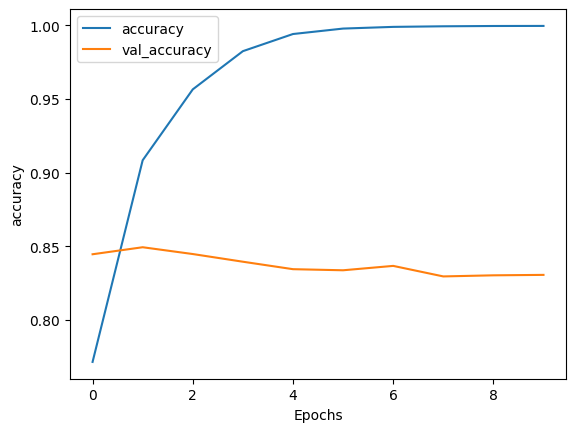

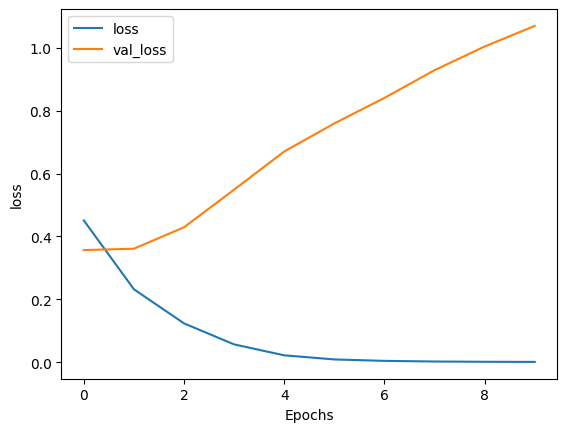

In [13]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(history_conv, 'accuracy')
plot_graphs(history_conv, 'loss')

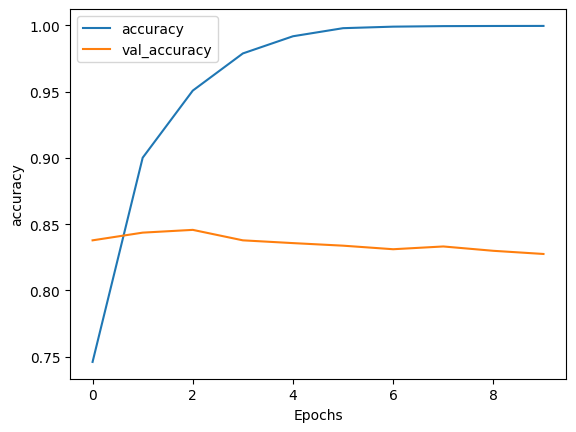

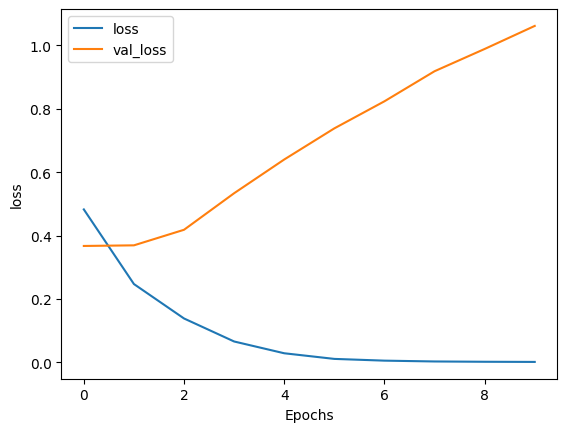

In [16]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(history_conv_1, 'accuracy')
plot_graphs(history_conv_1, 'loss')